**Problema**

Determina la tendencia del beneficio de los próximos 10 días de una empresa sabiendo que la tasa instantánea de variación de los ingresos es proporcional al beneficio inicial y los gastos son proporcional al beneficio existente en cada momento. Los ingresos y gastos iniciales son de 5 y 1 millón de euros y las constantes de porporcionalidad son de $\frac{1}{2}$ y 2.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
Ingreso_inicial=5
Gasto_inicial=1
b0=Ingreso_inicial-Gasto_inicial

# Derivada del Ingreso con respecto al tiempo, encontramos I(t) con sympy
def ing(k=1/2,b=b0):
    return k*b

cte=ing()

I=sp.Function('I')
t=sp.var('t')

ed = sp.Eq( sp.diff(I(t),t), cte )
sp.dsolve(ed,I(t))

Eq(I(t), C1 + 2.0*t)

In [3]:
sp.dsolve(ed,I(t)).subs(t,0)
# Como el ingreso incial es de 5, la solución analítica es: I(t)=2t+5

Eq(I(0), C1)

In [9]:
# Ahora usamos la función anterior para encontrar la función de gasto, que depende del beneficio
# G(t)=k*B(t)
# B(t) representa el beneficio de la empresa y B(t)=I(t)-G(t), sabemos la función de I(t)

def Gasto(t,G,k):
    return k*((2*t+5)-G)

G=sp.Function('G')
t=sp.var('t')

Gasto(t,G(t),2)

4*t - 2*G(t) + 10

In [10]:
sp.dsolve(sp.diff(G(t),t)-Gasto(t,G(t),2),G(t))

Eq(G(t), C1*exp(-2*t) + 2*t + 4)

In [11]:
sp.dsolve(sp.diff(G(t),t)-Gasto(t,G(t),2),G(t)).subs(t,0)

Eq(G(0), C1 + 4)

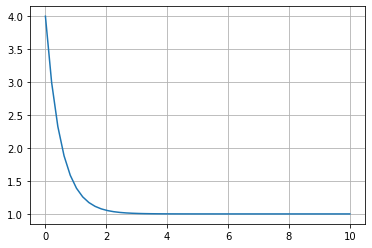

In [12]:
# G(0)= 1, entonces C1= -3

def sol_beneficio(t):
    return ((2*t)+5)-((-3*np.exp(-2*t))+(2*t)+4)

t=np.linspace(0,10,50)

%matplotlib inline

plt.figure()
plt.plot(t,sol_beneficio(t))
plt.grid()
